In [1]:
import pandas as pd

In [2]:
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain",
                "capital-loss", "hours-per-week", "native-country", "income"]

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

In [4]:
df = pd.concat([X, y], axis=1)
df.columns = column_names

In [5]:
df["income"] = df["income"].replace("<=50K.", "<=50K")
df["income"] = df["income"].replace(">50K.", ">50K")
unique_values = df['income'].unique()

# Print the unique values
print(unique_values)

['<=50K' '>50K']


In [6]:
print(df.isna().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [7]:
missing_data_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing data:", missing_data_columns)

Columns with missing data: ['workclass', 'occupation', 'native-country']


In [8]:
for col in missing_data_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
print(df.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [10]:
df = df.drop_duplicates()
duplicates = df.duplicated()
print(duplicates.sum())

0


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 48793 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48793 non-null  int64 
 1   workclass       48793 non-null  object
 2   fnlwgt          48793 non-null  int64 
 3   education       48793 non-null  object
 4   education-num   48793 non-null  int64 
 5   marital-status  48793 non-null  object
 6   occupation      48793 non-null  object
 7   relationship    48793 non-null  object
 8   race            48793 non-null  object
 9   sex             48793 non-null  object
 10  capital-gain    48793 non-null  int64 
 11  capital-loss    48793 non-null  int64 
 12  hours-per-week  48793 non-null  int64 
 13  native-country  48793 non-null  object
 14  income          48793 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB
None


In [12]:
df["workclass"] = df["workclass"].replace("?", "Private")
print(df.workclass.value_counts())

workclass
Private             36658
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [13]:
df["occupation"] = df["occupation"].replace("?", "Prof-specialty")
df.occupation.value_counts()

occupation
Prof-specialty       8973
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [14]:
df["native-country"] = df["native-country"].replace("?", 'United-States')
df["native-country"].value_counts()


native-country
United-States                 44651
Mexico                          943
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [15]:
rows_with_question_mark = df[df.apply(lambda x: x == ' ?').any(axis=1)]
rows_with_question_mark

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [16]:
print(df.describe(exclude='number'))

       workclass education      marital-status      occupation relationship  \
count      48793     48793               48793           48793        48793   
unique         8        16                   7              14            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       36658     15770               22366            8973        19703   

         race    sex native-country income  
count   48793  48793          48793  48793  
unique      5      2             41      2  
top     White   Male  United-States  <=50K  
freq    41717  32617          44651  37112  


D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


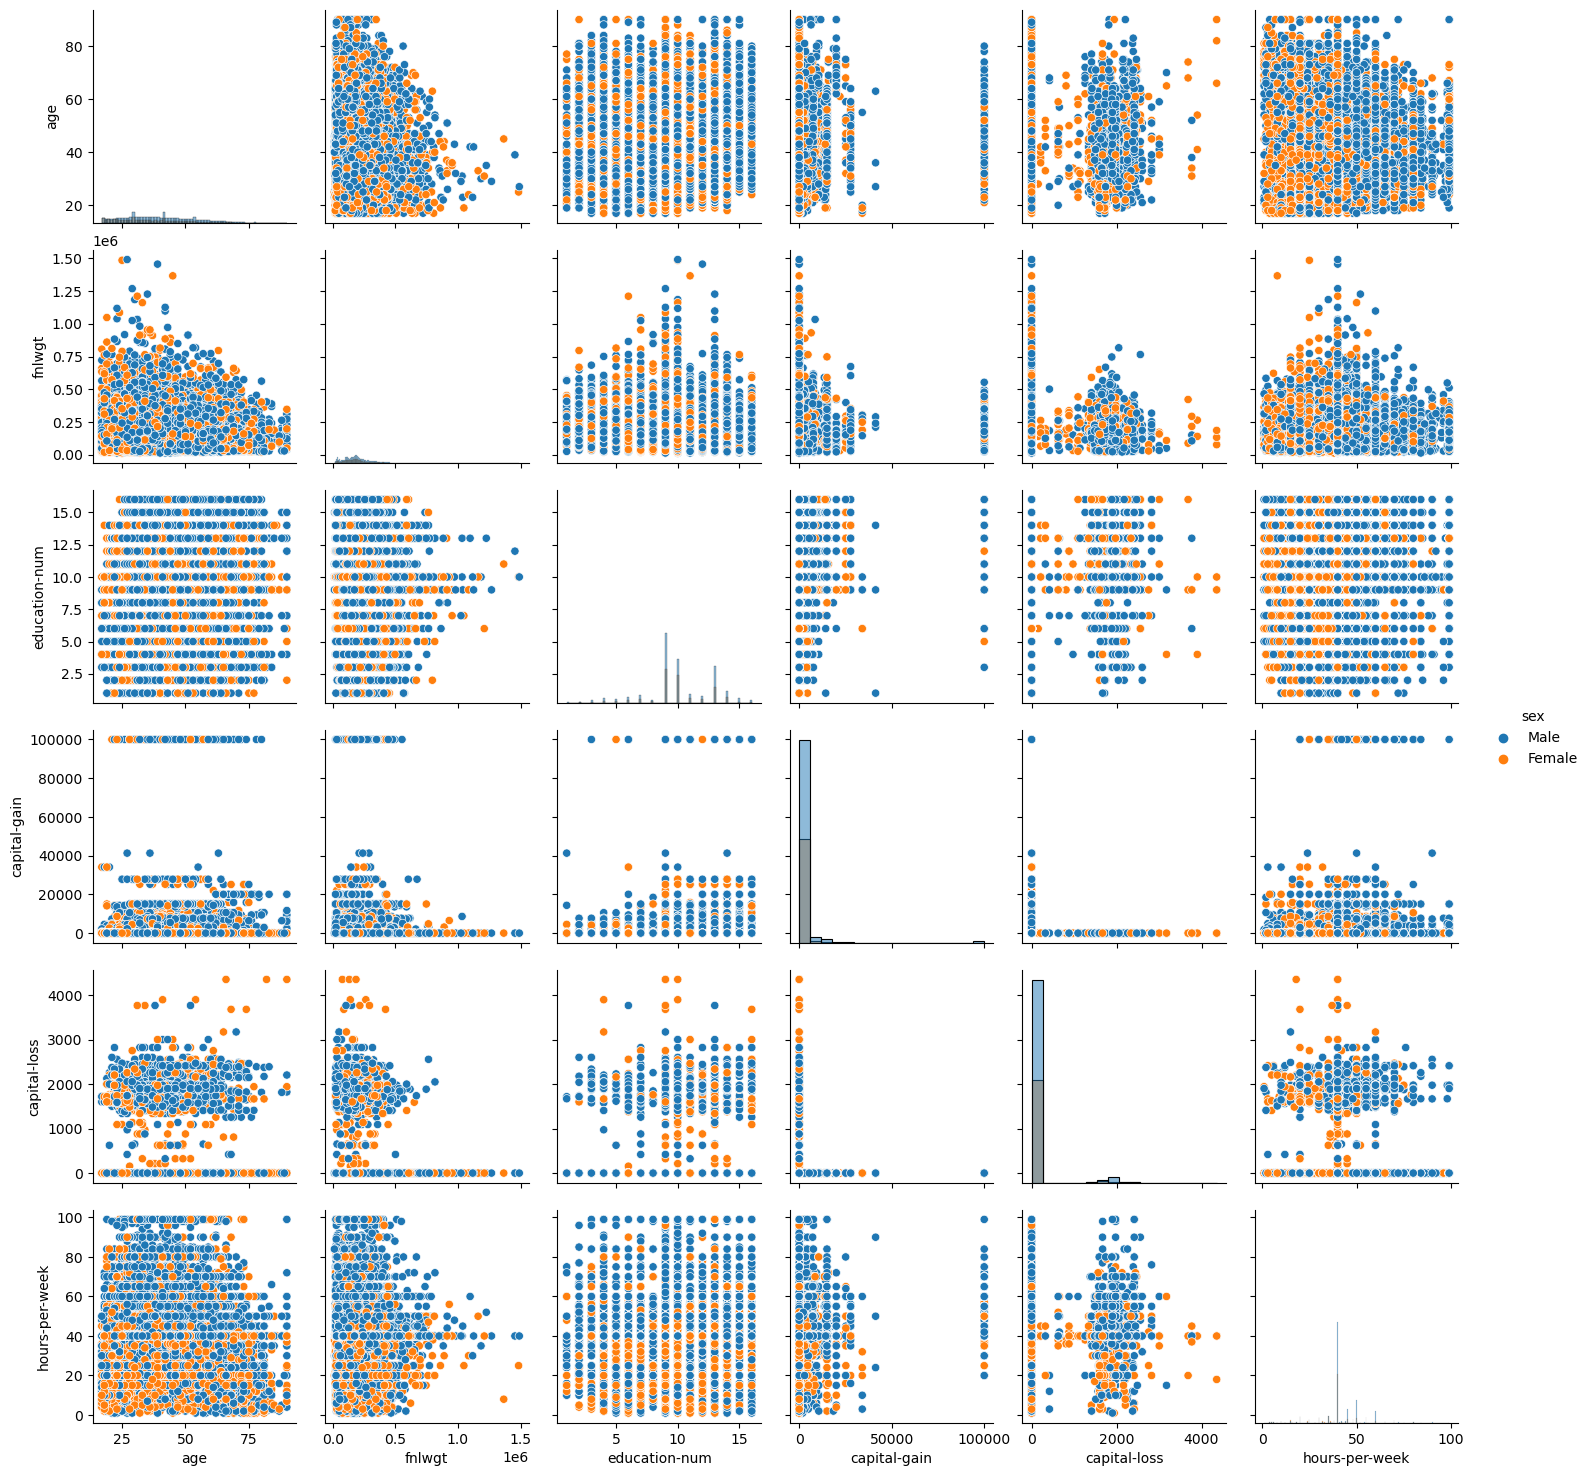

In [17]:
import seaborn as sns
sns.pairplot(df, hue="sex", diag_kind='hist')

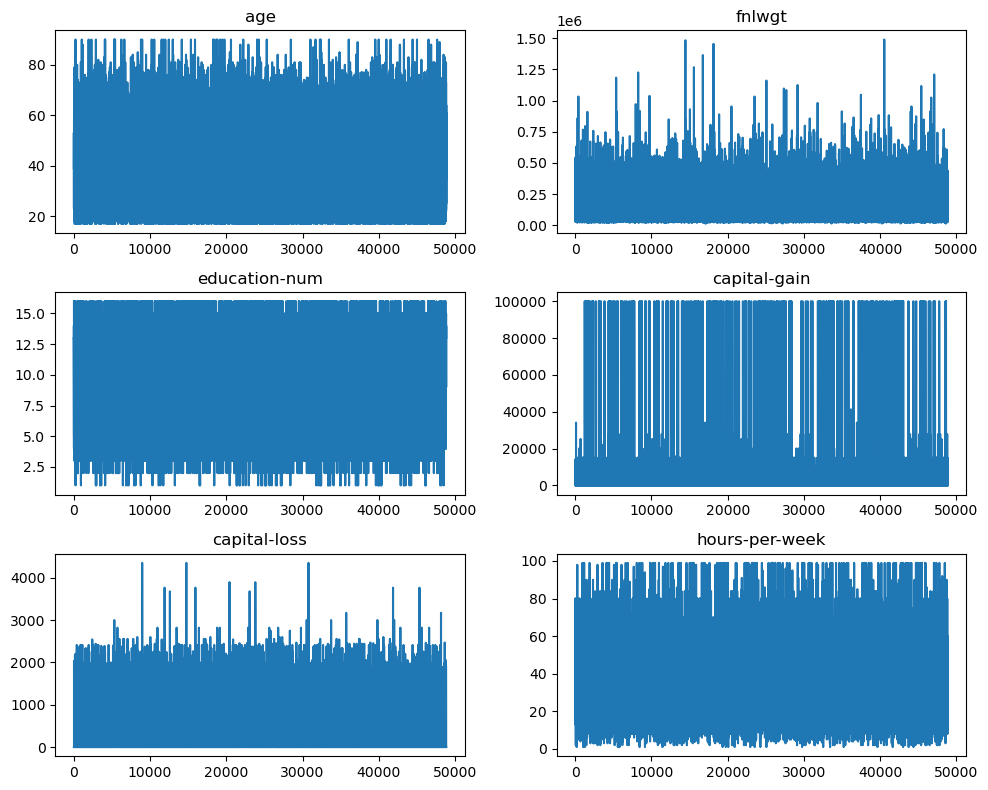

In [18]:
import matplotlib.pyplot as plt

nrows = 3
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))
df_col_names = df.select_dtypes(include='number').columns.tolist()
s = 0

# Plot on each subplot
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i, j]
        ax.plot(df.index, df[df_col_names[s]])
        ax.set_title(df_col_names[s])
        s += 1

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
import numpy as np

def detect_outliers_zscore(data, threshold=3):
    """
    Detect outliers using z-score method.
    
    Parameters:
        data (array-like): Input data.
        threshold (float): Z-score threshold for identifying outliers.
    
    Returns:
        array: Boolean array indicating whether each data point is an outlier.
    """
    # Calculate mean and standard deviation
    mean = np.mean(data)
    std_dev = np.std(data)
    
    # Calculate z-scores for each data point
    z_scores = (data - mean) / std_dev
    
    # Identify outliers based on threshold
    outliers = np.abs(z_scores) > threshold
    
    return outliers

In [20]:
df_col_names = df.select_dtypes(include='number').columns.tolist()
for col in df_col_names:
    print(col)
    data = df[col]
    outliers = detect_outliers_zscore(data)
    print("Outliers detected:", data[outliers])
    df = df[~outliers]

age
Outliers detected: 222      90
430      80
918      81
1040     90
1168     88
         ..
48495    84
48524    80
48564    80
48667    83
48812    81
Name: age, Length: 185, dtype: int64
fnlwgt
Outliers detected: 37       544091
40       507875
182      633742
192      523910
215      635913
          ...  
48321    771836
48458    618808
48466    573446
48578    532969
48734    607658
Name: fnlwgt, Length: 505, dtype: int64
education-num
Outliers detected: 160      2
221      2
224      1
416      2
463      2
        ..
48074    1
48215    1
48231    2
48347    2
48525    1
Name: education-num, Length: 311, dtype: int64
capital-gain
Outliers detected: 106      34095
704      25236
1246     99999
1368     99999
1482     99999
         ...  
48582    99999
48591    99999
48598    99999
48629    99999
48785    27828
Name: capital-gain, Length: 326, dtype: int64
capital-loss
Outliers detected: 23       2042
32       1408
52       1902
93       1573
96       1902
         ... 
48783 

In [21]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
categorical_columns = df.select_dtypes(include=['object','category']).columns.tolist()
print(categorical_columns)
label_encoder = LabelEncoder()

print(df.columns)

for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

ros = RandomOverSampler(random_state=42)

# Perform random oversampling
X_resampled, y_resampled = ros.fit_resample(df.drop(columns=['income']), df['income'])

scaler = StandardScaler()

dataset = scaler.fit_transform(X_resampled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset, y_resampled, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", train_accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
print(clf.feature_importances_)

Accuracy: 0.927701601304056
Accuracy: 0.9999383578532095
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     10429
           1       0.89      0.98      0.93     10429

    accuracy                           0.93     20858
   macro avg       0.93      0.93      0.93     20858
weighted avg       0.93      0.93      0.93     20858

[0.17515161 0.0327136  0.1667047  0.03473622 0.07588048 0.11434073
 0.06408481 0.13229618 0.01328856 0.02072663 0.0752784  0.00029237
 0.08068294 0.01382278]


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid
param_grid = {"n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
           "max_depth": [int(x) for x in np.linspace(10, 110, num = 11)],
           "min_samples_split": [2, 5, 10],
           "min_samples_leaf": [1, 2, 4],
           "max_features": ['auto', 'sqrt'],
           "max_samples": [10000]}

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Instantiate RandomizedSearchCV model
random_search = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1, random_state=42),
                              param_distributions=param_grid,
                              n_iter=30,
                              cv=5,
                              verbose=True)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Get the best model
best_rf_model = random_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_rf_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

accuracy = best_rf_model.score(X_train, y_train)
print("Train Accuracy:", accuracy)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


D:\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTre

D:\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTre

D:\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTre

Best Parameters: {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_samples': 10000, 'max_features': 'sqrt', 'max_depth': 90}
Test Accuracy: 0.8818678684437626
Train Accuracy: 0.9322758280595053


In [24]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Assuming X is your feature matrix and y is your target vecto

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model to the training data
gnb.fit(X_train, y_train)

# Predict on the test data
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

y_train_pred = gnb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Test Accuracy: 0.779365231565826
Train Accuracy: 0.7764650283553876
              precision    recall  f1-score   support

           0       0.80      0.74      0.77     10429
           1       0.76      0.82      0.79     10429

    accuracy                           0.78     20858
   macro avg       0.78      0.78      0.78     20858
weighted avg       0.78      0.78      0.78     20858



In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the model
model = GaussianNB()

# Define the grid of parameters to search
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

# Evaluate the model on the test set using the best parameters
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
train_accuracy = best_model.score(X_train, y_train)
print("Train Accuracy:", train_accuracy)

Best Parameters: {'var_smoothing': 0.0533669923120631}
Best Accuracy: 0.7775129932628339
Test Accuracy: 0.7807555853869019
Train Accuracy: 0.777636229144407
